## data mountains
## turn your data into mountains!

After lots of trouble with other vis (we will see), i thought it would be nice to have something like james cheshire's population lines

<img src="../vis/population_lines_london.jpg" alt="drawing" style="height:500px;"/>

https://jcheshire.com/featured-maps/population-lines-how-and-why-i-created-it/

...but ended up with something like this:

<div id="ldn-lsoas"><img src="../vis/visualization.svg" /></div>
<script defer src="./panzoom.js"></script>

<script>
  window.onload = function (){
    const elem = document.getElementById('ldn-lsoas')
    const panzoom = Panzoom(elem)
    elem.addEventListener('click', panzoom.zoomIn)
    elem.addEventListener('dblclick', panzoom.reset)
    elem.addEventListener('wheel', panzoom.zoomWithWheel)
  }
</script>



before we start, a quick note about census geographies

<a href="https://ocsi.uk/2019/03/18/lsoas-leps-and-lookups-a-beginners-guide-to-statistical-geographies/"><img src="../vis/OA-LSOA-MSOA.png" alt="drawing" /></a>

| **Area type**                       | **People (min)**    | **People (max)**    | **Households (min)**| **Households (max)**|
|-------------------------------------|---------------------|---------------------|---------------------|---------------------|
| **Output Areas**                    | 100                 | 625                 | 40                  | 250                 |
| **Lower Layer Super Output Areas**  | 1,000               | 3,000               | 400                 | 1,200               |
| **Middle Layer Super Output Areas** | 5,000               | 15,000              | 2,000               | 6,000               |

https://www.ons.gov.uk/methodology/geography/ukgeographies/censusgeographies/census2021geographies


### ...OK let's go! Census 2021 data for england and wales is out now

* I work for the part of London that is the "fastest growing, [densest](https://diamondgeezer.blogspot.com/2023/02/the-uks-most-densely-populated.html), least old, youngest [local authority in the whole of the country](https://diamondgeezer.blogspot.com/2022/11/census-2021.html)": Tower Hamlets
* in the course of trying to map some of these phenomena i ended up publishing a data vis package in python called __data mountains__




## where is tower hamlets?

<img style="display: inline-block; vertical-align: middle; height: 400px" alt="london boroughs shaded by pop density" src="../vis/where-is-tower-hamlets.png" height="400px"/>

in 2011 islington was the most population dense borough 

in 2021 the most population dense borough is tower hamlets


## first port of call, choropleth

#### but this one looks washed out...

<!-- 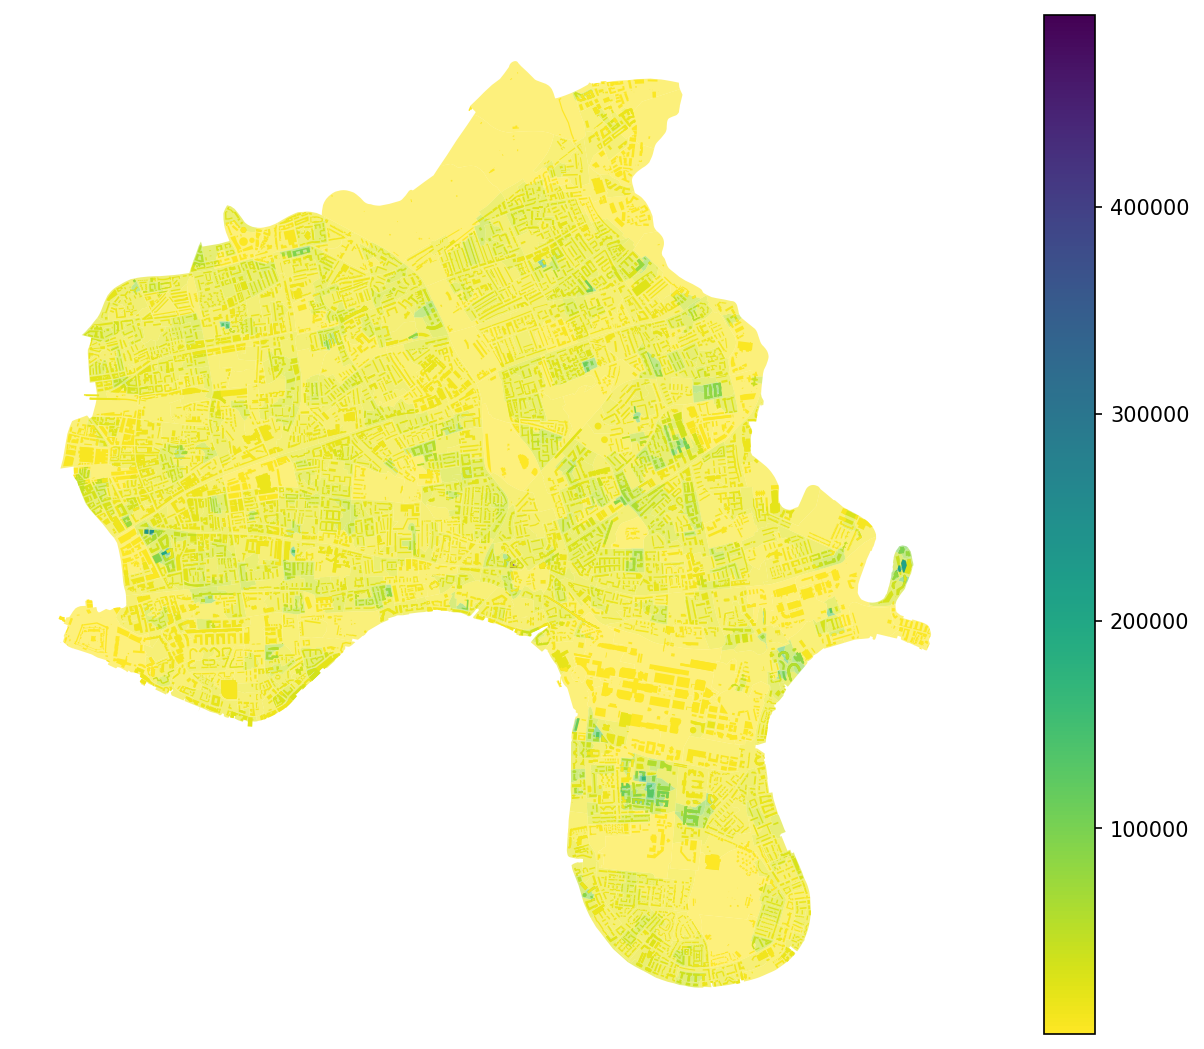 -->
<img src="../vis/choro.png" alt="drawing" style="height:400px;"/>

...and in which OA(s) is there a value of way over 400K (shown on legend, but invisible on the map)?


### ...hmm, the data is not normally distributed

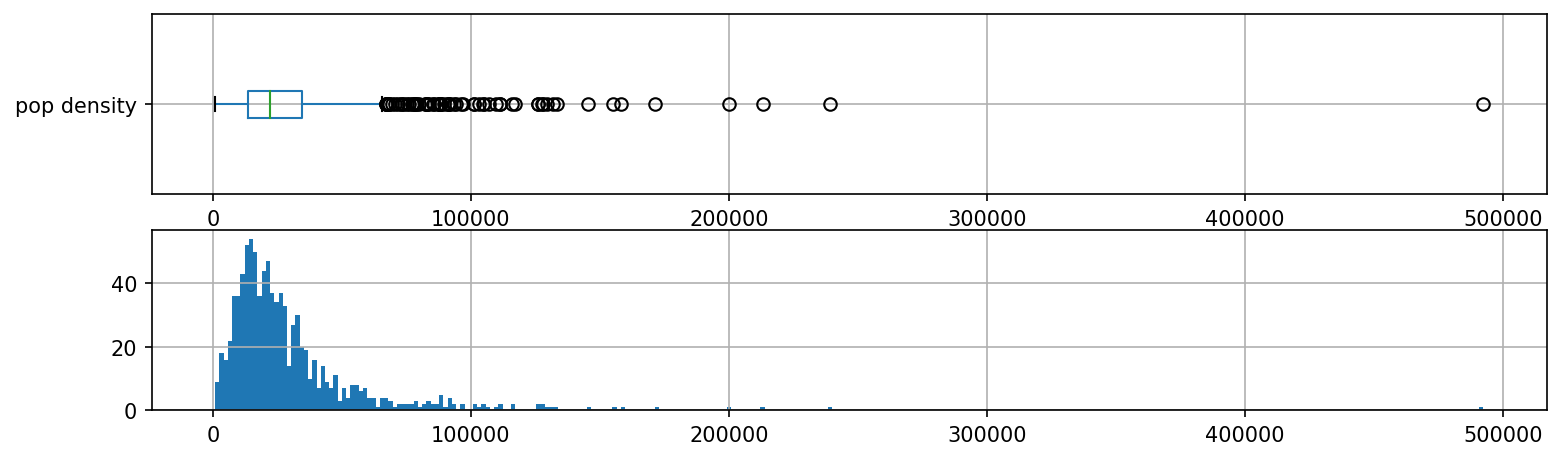

### so we log transform the data

#### ...but we can't see any really high value polygons

<!-- ![image.png](attachment:image-2.png) -->
<img src="../vis/choro-log-transformed.png" alt="drawing" style="height:400px;"/>

...and the legend is less useful now.

building footprints via https://osmnx.readthedocs.io/en/stable/internals-reference.html#osmnx-features-module 

### let's try a density equalising cartogram 

...aha, look right in the centre, there's something there!

<img src="../vis/lbth_census21_pop_density.gif" alt="posit" style="height:400px;"/>

https://cran.r-project.org/web/packages/cartogram/readme/README.html

### look, datawrapper has an interesting symbology

<img src="../vis/datawrapper-symbol-plot.png" alt="drawing" style="height:500px;"/>

...it shows that outlier loud and proud!

https://www.datawrapper.de/_/VPYgl/

### ...remember this?

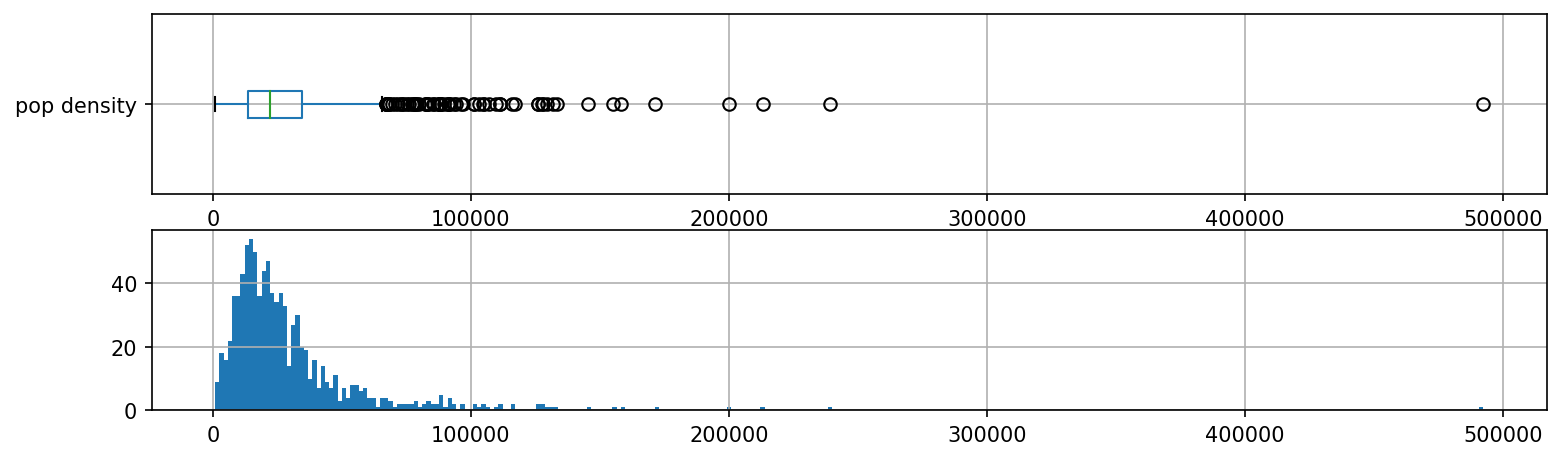

#### ...ah yes, that is a very small census area, so the density is high relative to the space

<img src="../vis/datawrapper-symbol-plot-closeup.png" alt="drawing" style="height:400px;"/>

https://www.datawrapper.de/_/VPYgl/

this is what's known to the ONS as a "corner case" - some corners (or holes) in the 2011 OAs have been cut to fit OAs to size thresholds in 2021 - so sometimes they end up with just one building for example...
<!-- TODO add OA overlay to osm basemap to show where iona tower is -->

#### here it is, a statistical geography that is just a slice of one building: Coral Apartments in Limehouse

<img style="display: inline-block; vertical-align: middle; height: 400px" src='../vis/coral-apartments-limehouse.jpg' />

...the OA dataset has a few outliers - the pointed datavis was a good way to make this salient (instead of choropleth or cartogram)


#### here is the coral apartments OA over last two censuses

<img style="display: inline-block; vertical-align: middle; height: 225px" src='../vis/coral-apartments-limehouse-2011.png' height="225px"/>
<img style="display: inline-block; vertical-align: middle; height: 225px" src='../vis/coral-apartments-limehouse-2021.png' height="225px"/>

### playing with datawrapper was fun

#### the pointy map symbols reminded me of middle earth

<!-- ![image.png](../vis/middle-earth.png) -->
<img src="../vis/middle-earth.png" alt="drawing" style="height:400px;"/>

...but you can't hack on datawrapper enough to get that sort of map.

### i tried to emulate hand drawn maps in python

#### the essence of data mountains is a simple function that turns a point into a mountain (well, a line in Shapely), sized by a data attribute of that point

<img src="../vis/function-make-peak.png" alt="make_peak function" style="height:500px;"/>


## population density
<!-- 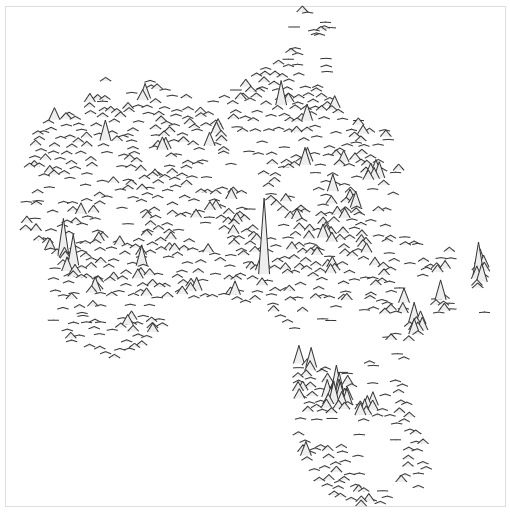 -->
<img src="../vis/pop-density-2021-lb-th.png" alt="drawing" style="height:500px;"/>

### let's try another dataset: one bedroom homes
<img src="../vis/lbth-census-2021-1-bed-homes.png" alt="drawing" style="height:500px;"/>

### two bedroom homes
<img style="display: inline-block; vertical-align: middle; height: 300px" src="../vis/lbth-census-2021-2-bed-homes.png" alt="2-bed" style="height:300px;"/>
<img style="display: inline-block; vertical-align: middle; height: 300px" src="../vis/3d-pop-density-rotate.gif" alt="3d-map-rotation" style="height:300px;"/>

the limitations of the technique become apparent when the mountains obscure each other, the solution is to animate or enable manual map rotation.

### three bedroom homes
<!-- ![3 bed homes](../vis/lbth-census-2021-3-bed-homes.png) -->
<img src="../vis/lbth-census-2021-3-bed-homes.png" alt="drawing" style="height:500px;"/>

### four or more bedroom homes
<!-- ![4+ bed homes](../vis/lbth-census-2021-4-plus-bed-homes.png) -->
<img src="../vis/lbth-census-2021-4-plus-bed-homes.png" alt="drawing" style="height:500px;"/>

### population density again, it can a bit odd at OA resolution
<img style="display: inline-block; vertical-align: middle; height:300px" src="../vis/pop-density-2021-lb-kens-and-chels.png" alt="drawing" style="height:300px;"/>
<img style="display: inline-block; vertical-align: middle; height:300px" src="../vis/chelsea-cloisters.jpg" alt="drawing" style="height:300px;"/>

the OA wrapping chelsea cloisters has a population density of 2 million people per square km?! (the highest in the country as it turns out).
according to the ONS, the LSOA population density holds up well, but there are a few "corner cases" that manifest as outliers in the OA dataset, this being the most extreme.

https://www.ons.gov.uk/visualisations/censuspopulationchange/E09000020/

... also see https://www.ons.gov.uk/visualisations/dvc1371/#/E09000020

#### here is the chelsea cloisters OA over last two censuses

<img style="display: inline-block; vertical-align: middle; height: 225px" src='../vis/chelsea-cloisters-2011.png' height="225px"/>
<img style="display: inline-block; vertical-align: middle; height: 225px" src='../vis/chelsea-cloisters-2021.png' height="225px"/>

### data mountains in a more central area

#### westminster population density

![westminster population density](../vis/pop-density-2021-lb-westminster.png)

### data mountains in an inner-outer city area
<!-- ![westminster population density](../vis/pop-density-2021-lb-greenwich.png) -->

<img style="display: inline-block; vertical-align: middle; height: 300px" src="../vis/pop-density-2021-lb-greenwich.png" />
<img style="display: inline-block; vertical-align: middle; height: 300px" src="../vis/pop-density-2021-lb-greenwich-w-base.png" />

there's a nice primordial forest here that was almost concreted over in 1994 - you can still make out what would have been a motorway route along the less populated eastern hills and marshes, although the transport minister did compulsorily purchase many homes too https://www.roads.org.uk/ringways/ringway2

### data mountains in an another inner-outer city area

<img style="display: inline-block; vertical-align: middle; height: 400px" src="../vis/pop-density-2021-lb-southwark.png" />
<img style="display: inline-block; vertical-align: middle; height: 400px" src="../vis/pop-density-2021-lb-southwark-w-base.png" />

data mountains of southwark. i really like this one as it shows the graduation of people from the riverside metropolis south toward the last vestiges of the great north wood.

<img style="display: inline-block; vertical-align: middle; height: 300px" src="../vis/pop-density-2021-lb-lambeth.png" alt="drawing" style="height:300px;"/> 
<img style="display: inline-block; vertical-align: middle; height: 300px" src="../vis/middle-earth.png" alt="drawing" style="height:300px;"/>

here comes lambeth population density, and a good companion to southwark, although in this case the 'mountainous regions' don't track the thames river but instead the A3/A23 from waterloo to streatham, giving this a bit more of a misty mountains look.

### made with #nbdev!

#### using nbdev for this project made it extra fun

1. it cleans cell metadata during version control, avoiding merge conflicts
2. it enables you to easily share:
  1. code
  2. docs
  3. tests
  4. modules ... all at once!

  https://nbdev.fast.ai/

### in summary

1. good at showing outliers in exploring data
2. may lend itself to data storytelling
2. rotation is needed
